In [185]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(style="whitegrid");
pd.set_option('display.max_rows', None)
plt.rcParams['font.family'] = "Malgun Gothic"
# csv 읽어오기, 현재 위치에 해당 파일이 없으면 첫번째 파라미터에 정확한 경로를 포함한 파일명 기입
df = pd.read_csv('company_nps_data.csv', encoding='cp949')# 'cp949', 'euc-kr'
df.head()

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수
0,233757,41688077,2018,7,8912380,36
1,123464,1760695,2018,3,942380,5
2,342124,3221341,2018,7,781180,4
3,386420,4815584,2015,11,3795900,14
4,129243,9799736,2018,10,40724680,151


In [3]:
df.dropna().describe()

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수
count,9.980100e+04,9.980100e+04,99801.000000,99801.000000,9.980100e+04,99801.000000
mean,2.762982e+05,3.053589e+07,2016.967125,6.714352,9.734079e+06,37.623431
std,1.339032e+05,3.016647e+08,0.976688,3.512966,4.347256e+07,146.947194
min,6.300000e+01,-7.882176e+06,2015.000000,1.000000,0.000000e+00,0.000000
25%,1.655300e+05,1.409760e+06,2016.000000,4.000000,1.181160e+06,6.000000
50%,2.591490e+05,3.573585e+06,2017.000000,7.000000,2.332760e+06,11.000000
75%,3.826560e+05,9.582321e+06,2018.000000,10.000000,5.591860e+06,24.000000
max,5.159723e+06,1.132878e+10,2019.000000,12.000000,9.780673e+08,3133.000000


In [178]:
# 매출액 1000억이 한번이라도 있었던 기업 추출
id_list = df.loc[(df['연매출액'] > 100000000)].회사ID.unique()
id_list


array([231080, 130322, 232757, 127060, 130729, 231606, 419977, 510329,
       381180, 126606, 381344, 234236, 126831, 420082, 126664, 227414,
       128638, 420046, 129828, 127669, 126641,    102, 231703, 127511,
       126814, 420076, 294649, 440030, 128896, 403504, 403359, 294337,
       294530, 146654, 128539,     95, 294964, 126983,   2842, 297874,
       126521, 126772, 294620, 297327, 126516, 127090, 127180, 403351,
       128174, 127366, 419998, 294367, 130386, 231173, 127065, 154500,
       295805, 301484, 433492, 130577, 420008, 630190, 294790, 128440,
       403434, 403462, 126538, 403470, 426429, 227415, 130387,   8835,
       420237, 428817,  40860, 419945,     63, 295618, 126674, 469677,
       294387, 469458, 382850, 260890, 127202, 567650, 128485, 420092,
       231384,    597, 433756, 403522, 133951, 547586, 489849, 126802,
         5452, 430504, 296476, 420165, 580356, 439986, 439902],
      dtype=int64)

In [294]:
#데이터가 2년이상 있는 회사 리스트
df1 = df.groupby(['회사ID']).count()
df2 = df1.loc[df1['년도'] > 24]
id_list2 = df2.index
id_list2

Int64Index([ 14271,  59533, 122968, 122983, 123082, 123219, 123235, 123447,
            123464, 123649, 123882, 124181, 124223, 124281, 124386, 124388,
            124463, 124535, 124918, 125065, 125197, 125835, 125878, 125958,
            125984, 125987, 126282, 126365, 126516, 126521, 126538, 126606,
            126664, 126674, 126772, 126802, 126814, 126831, 126983, 127060,
            127065, 127090, 127142, 127180, 127202, 127366, 127503, 127511,
            127669, 127732, 127839, 128076, 128149, 128174, 128264, 128405,
            128415, 128440, 128485, 128488, 128539, 128592, 128638, 128723,
            128896, 128916, 128930, 129184, 129243, 129310, 129370, 129377,
            129436, 129486, 129633, 129652, 129718, 129774, 129828, 129861,
            129895, 130023, 130084, 130128, 130191, 130203, 130261, 130281,
            130322, 130344, 130386, 130387, 130428, 130577, 130647, 130729,
            130756, 130899, 130911, 130927, 130966, 131049, 131114, 131228,
            

In [187]:
s1 = set(id_list)
s2 = set(id_list2)

s3 = s1 & s2
s3
len(s3)

81

In [297]:
df2 = df.query('회사ID == 403434')
df3 = df2.groupby('년도').mean()
df3

,회사ID,연매출액,월,월별_연금보험료,월별_직원수
년도,,,,,
2015,403434.0,139353875.0,11.5,9.167397e+07,433.000000
2016,403434.0,147323098.0,6.5,9.723658e+07,453.916667
2017,403434.0,150446694.0,6.5,9.875063e+07,441.666667
2018,403434.0,169810428.0,6.5,1.011309e+08,436.083333


In [299]:
def get_growth_rate(id):

    df1 = df.query(f'회사ID == {id}')
    core_df = df1.groupby('년도').mean()
    
    max = core_df['연매출액'].max()
    idx = core_df.loc[core_df['연매출액'] == max].index[0]
    
    min = core_df.loc[:idx]['연매출액'].min()
    
    growth_rate = max/min
    
    return growth_rate
    
get_growth_rate(403434)

1.2185554797094806

In [302]:
high_growth_company_list = []
growth_rate = []
for i in s3:
    
    g_rate = get_growth_rate(i)
    
    if(g_rate > 2):
        high_growth_company_list.append(i) 
        growth_rate.append(g_rate)

print(high_growth_company_list)


[403470, 469677, 294620, 428817, 231703, 420165, 127366, 430504, 294337]


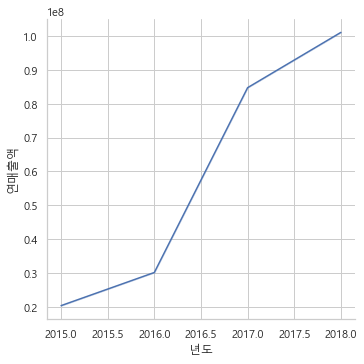

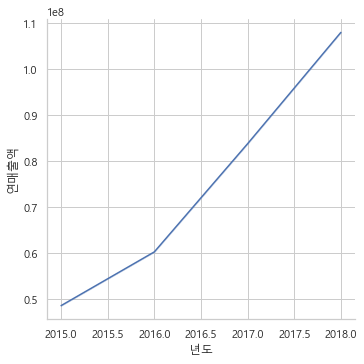

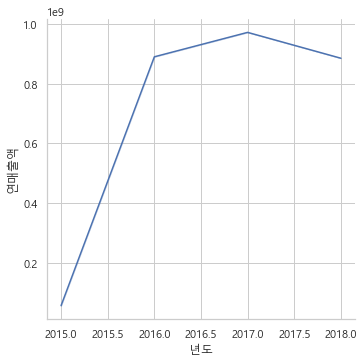

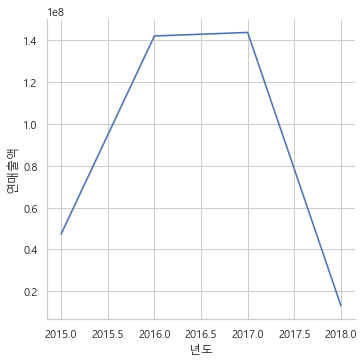

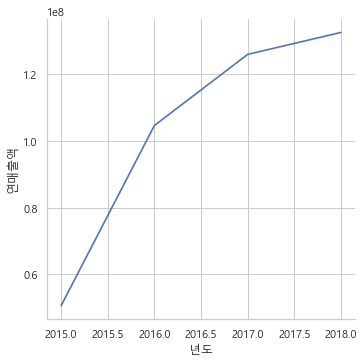

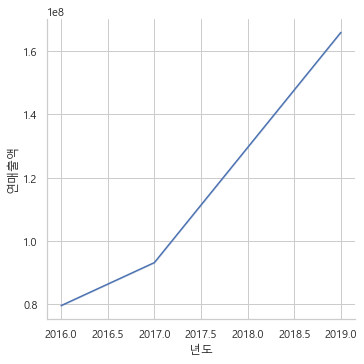

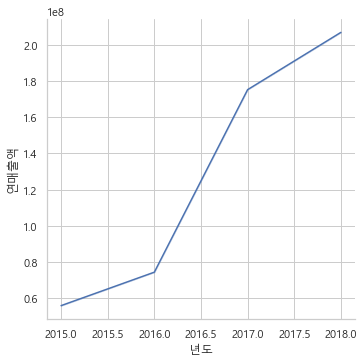

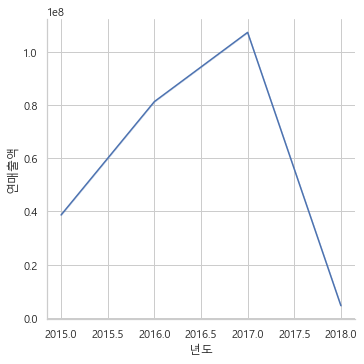

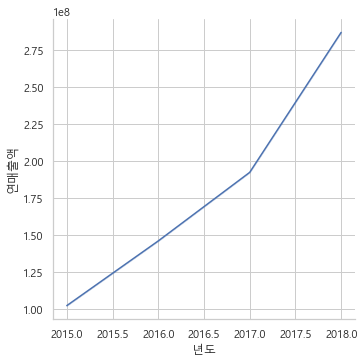

In [295]:
result_df = pd.DataFrame(columns = ['회사ID', '연매출액', '년도'])

for i in high_growth_company_list:

    result_df = df.query(f'회사ID == {i}').loc[:, '회사ID':'년도'].sort_values(by='년도')
    sns.relplot(x = '년도', y='연매출액', kind='line', data=result_df)

    
